# load all the libraries 

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 
import sklearn.datasets
import sklearn.linear_model


# load planer  dataset

In [38]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [39]:
X,Y=load_planar_dataset()

In [40]:
Y.shape

(1, 400)

# visualize_data

In [41]:
#plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [42]:
print(X[1, :].size)
print(X[0, :].size)
print(X.size)
Y.size

400
400
800


400

In [43]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    


In [45]:
def sigmoid(x):

    s = 1/(1+np.exp(-x))
    return s

In [46]:

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

# layer size

In [47]:
def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

In [48]:

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y


In [49]:
def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4,1)
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters

In [50]:
def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

In [51]:

def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess

In [52]:
def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess


# now create a model

## layer size











In [80]:
def layers_size(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return n_x,n_h,n_y

In [81]:
X_assess, Y_assess=layer_sizes_test_case()
X_assess

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944]])

## initialize parameter

In [82]:
def initialize_parameters(n_x,n_h,n_y):
    
    
    np.random.seed(2)
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
    
    
    #assert 
    assert(w1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(w2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    
    parameters={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    
    
    
    return parameters
    

In [83]:
n_x,n_h,n_y=initialize_parameters_test_case()
parameters=initialize_parameters(n_x,n_h,n_y)
parameters['w1']

array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]])

In [84]:
def forward_propagation(X,parameters):
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    
    z1=np.dot(w1,X)+b1
    A1=np.tanh(z1)
    z2=np.dot(w2,X)+b2
    A2=np.sigmoid(z2)
    
    
    assert(A2.shape==(1,X,shape[1]))
    
    cache={
        'z1':z1,
        'A1':A1,
        'z2':z2,
        'A2':A2
    }
    
    return A2,cache

    
    
    

In [85]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    
    w1=parameters['w1']
    w2=parameters['w2']
    
    
    logprobs=np.multiply(np.log(A2),Y)+np.multiply((1-Y),np.log(1-A2))
    
    cost=-np.sum(logprobs)/m
    
    assert(isinstance(cost,float))
    
    return cost


In [86]:
def backpropagation(parameters,cache,X,Y):
    m=X.shape[1]
    w1=parameters['w1']
    w2=parameters['w2']
    
    A1=cache['A1']
    A2=cache['A2']
    
    
    dz2=A2-Y
    dw2=1/m*np.dot(dz2,A1.T)
    db2=1/m*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.dot(w2.T,dz2)*(1-np.power(A1,2))
    dw1=1/m*np.dot(dz1,X.T)
    db1=1/m*np.sum(dz1,axis=1,keepdims=True)
    
    grads={
        
        'dw1':dw1,
        'db1':db1,
        'dw1':dw1,
        'db1':db1
    }
    
    return grads
    

In [87]:
def update_parameters(parameters,grads,learning_rate=1.2):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['w2']
    
    
    dw1=grads['dw1']
    db1=grads['db1']
    dw2=grads['dw2']
    db2=grads['db2']
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw1
    b2=b2-learning_rate_db2
    
    
    
    parameters={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    
    return parameters

In [88]:
def nn_model(X,Y,num_iterations=10000,print_cost=False):
    
    
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layers_size(X,Y)[0]
    
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    w1=parameters['w1']
    w2=parameters['w2']
    b1=parameters['b1']
    b2=parameters['b2']
    
    
    
    for i in range(0,num_iterations):
        
        A2,cache=forward_propagation(X,parameters)
        
        cost=compute_cost(A2,Y,parameters)
        
        
        grads=backward_propagation(parameters,cache,X,Y)
        
        
        parameters=update_parameters(parameters,grads)
        
        
        
        
        if print_cost and i%1000==0:
            print('cost after iteration %i %f' %(i,cost))
            
    return parameters        
        
        
        
    
    
    

In [89]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


ValueError: shapes (2,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

In [90]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions=np.round(A2)
    return predictions


TypeError: nn_model() got multiple values for argument 'num_iterations'

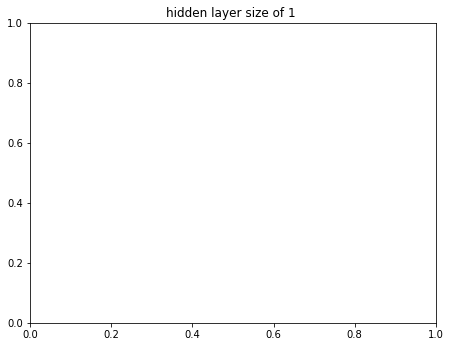

In [79]:
plt.figure(figsize=(16,32))
hidden_layer_sizes=[1,2,3,4,5,10,20,30,50,100]

for i,n_h in enumerate(hidden_layer_sizes): 
    plt.subplot(5,2,i+1)
    plt.title('hidden layer size of %d '% n_h)
    parameters=nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))



In [ ]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);